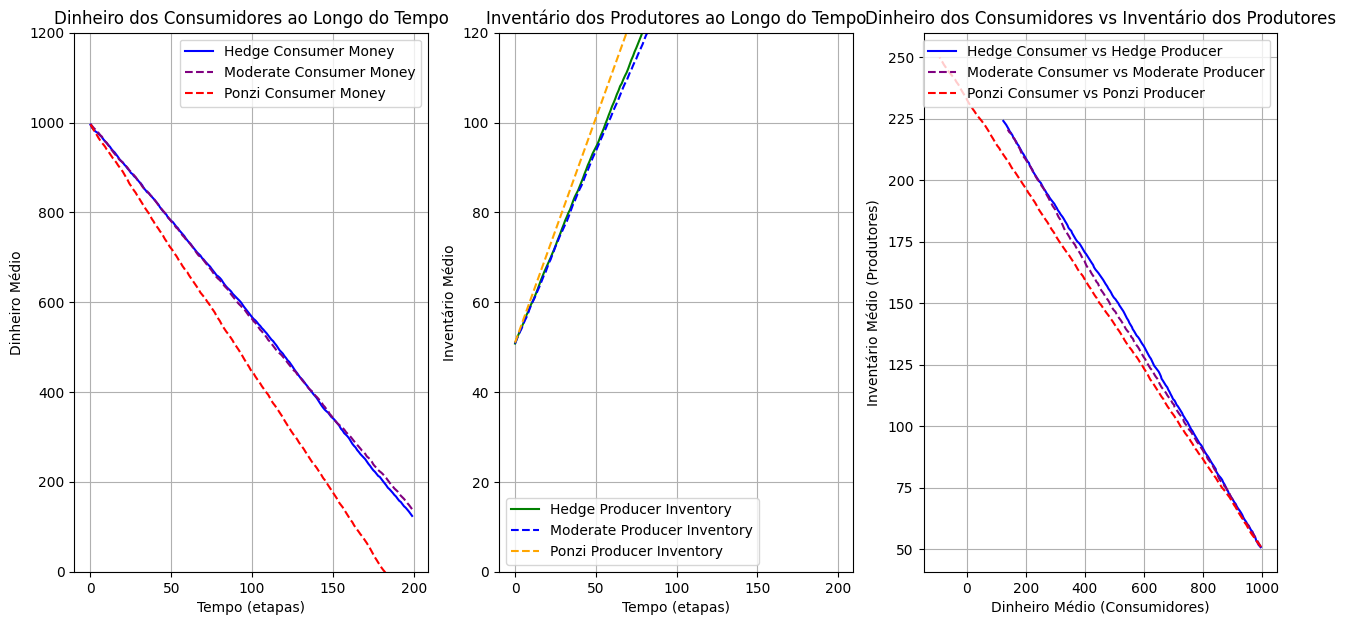

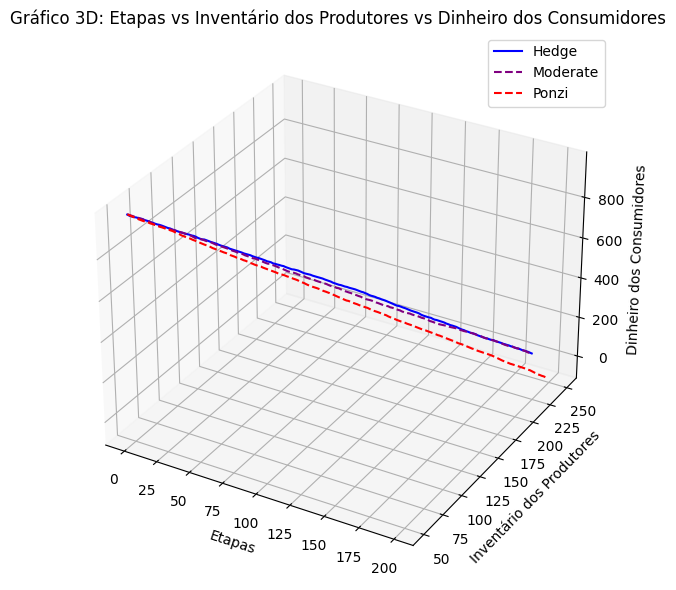

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Agente HedgeConsumer
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        price = np.random.uniform(1, 10)
        gain = np.random.uniform(5, 15)
        utility_gain = gain - price
        utility_loss = self.loss_aversion * (price - gain)
        if utility_gain > utility_loss:
            self.money -= price

# Agente ModerateConsumer
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        price = np.random.uniform(1, 10)
        gain = np.random.uniform(5, 15)
        utility_gain = gain - price
        if utility_gain > 0:
            self.money -= price

# Agente PonziConsumer
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Agente HedgeProducer
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Agente ModerateProducer
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Agente PonziProducer
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Definindo o modelo de mercado
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Criando e adicionando agentes
        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=1.5)  # Parâmetro
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=1.5)  # Parâmetro
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Modelo de mercado
model = MarketModel(60, 10, 10)

# Listas para armazenar os valores ao longo do tempo
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []
steps = []

# Executando o modelo
for i in range(200):
    model.step()

    # Calculando as médias dos consumidores e produtores
    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))
    steps.append(i)

# Plot dos resultados
plt.figure(figsize=(21, 7))

# Gráfico do dinheiro dos consumidores ao longo do tempo
plt.subplot(1, 4, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)
plt.title('Dinheiro dos Consumidores ao Longo do Tempo')
plt.xlabel('Tempo (etapas)')
plt.ylabel('Dinheiro Médio')
plt.legend()
plt.grid(True)

# Gráfico do inventário dos produtores ao longo do tempo
plt.subplot(1, 4, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.ylim(0, 120)
plt.title('Inventário dos Produtores ao Longo do Tempo')
plt.xlabel('Tempo (etapas)')
plt.ylabel('Inventário Médio')
plt.legend()
plt.grid(True)

# Gráfico do dinheiro dos consumidores vs inventário dos produtores
plt.subplot(1, 4, 3)
plt.plot(hedge_consumer_money_over_time, hedge_producer_inventory_over_time, color='blue', label='Hedge Consumer vs Hedge Producer')
plt.plot(moderate_consumer_money_over_time, moderate_producer_inventory_over_time, color='purple', linestyle='--', label='Moderate Consumer vs Moderate Producer')
plt.plot(ponzi_consumer_money_over_time, ponzi_producer_inventory_over_time, color='red', linestyle='--', label='Ponzi Consumer vs Ponzi Producer')
plt.title('Dinheiro dos Consumidores vs Inventário dos Produtores')
plt.xlabel('Dinheiro Médio (Consumidores)')
plt.ylabel('Inventário Médio (Produtores)')
plt.legend()
plt.grid(True)

# Gráfico 3D dos passos vs inventário dos produtores vs dinheiro dos consumidores
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(steps, hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge')
ax.plot(steps, moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate')
ax.plot(steps, ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi')
ax.set_title('Gráfico 3D: Etapas vs Inventário dos Produtores vs Dinheiro dos Consumidores')
ax.set_xlabel('Etapas')
ax.set_ylabel('Inventário dos Produtores')
ax.set_zlabel('Dinheiro dos Consumidores')
ax.legend()

#plot
plt.tight_layout()
plt.show()
